Задание 1

- Базово изучите датасет (достаточно методов info() и describe()).  
- Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.

Желательно, но не обязательно:  
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.
Для работы используйте датасет “happines_corruption.csv”, приложенный к материалам занятия.   
Описание столбцов:
- Country — название страны.
- happiness_score — среднее значение ответов на основной вопрос оценки жизни из опроса Gallup World Poll (GWP). 0–10
- gdp_per_capita — степень, в которой ВВП влияет на расчет индекса счастья.
- family — степень, в которой семья влияет на расчет индекса счастья.
- health — степень, в которой ожидаемая продолжительность жизни влияет на расчет индекса счастья.
- freedom — степень, в которой свобода влияет на расчет индекса счастья.
- generosity — числовое значение, рассчитанное на основе восприятия щедрости в своей стране участниками опроса.
- government_trust — степень, в которой восприятие коррупции влияет на индекс счастья.
- dystopia_residual — оценка, рассчитанная на основе гипотетического сравнения с самой грустной страной мира.
- continent — регион страны.

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/happines_corruption[1].csv')

df.head(10)

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90
5,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Europe,2015,0.0,84
6,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America,2015,0.0,83
7,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia,2015,0.0,91
8,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Europe,2015,0.0,89
9,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Australia,2015,0.0,79


In [ ]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


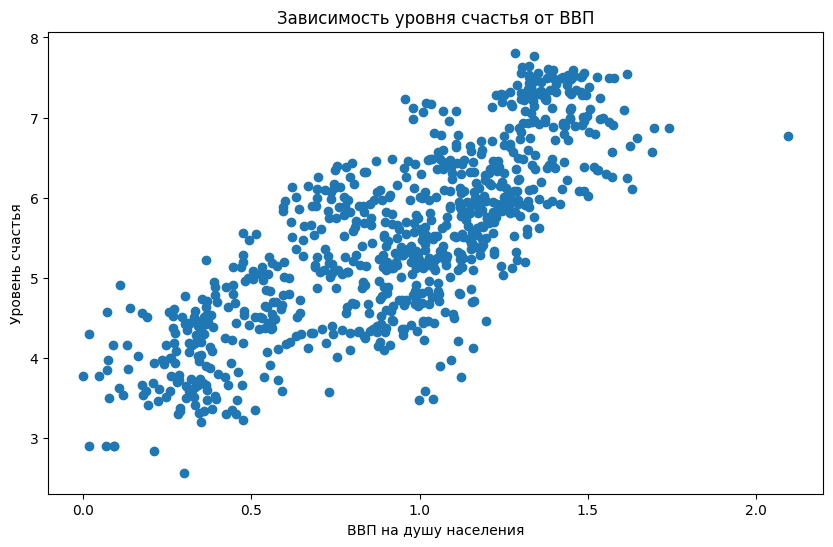

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['gdp_per_capita'], df['happiness_score'])
plt.xlabel('ВВП на душу населения')
plt.ylabel('Уровень счастья')
plt.title('Зависимость уровня счастья от ВВП')
plt.show()

In [ ]:
"""Проверим зависит ли уровень счастья от ВВП."""

from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau

"""Проверим через тест Шапиро-Уилка на нормальность распределения, если р-значение >0.05
значит распределение не нормальное."""

stat1, p_value1 = shapiro(df['happiness_score'])
stat2, p_value2 = shapiro(df['gdp_per_capita'])

print(f"Статистика1:{stat1:.10f} , р-значение1:{p_value1:.10f}")
print(f"Статистика2:{stat2:.10f} , р-значение2:{p_value2:.10f}")

"""Поскольку данные не распределены нормально и есть выбросы, посчитаем корреляцию Спирмена и Кендалла."""

spirmen_coef = df['happiness_score'].corr(df['gdp_per_capita'], method='spearman')
kendall_coef = df['happiness_score'].corr(df['gdp_per_capita'], method='kendall')

print(f"Корреляция Спирмена:{spirmen_coef:.10f}")
print(f"Корреляция Кендалла:{kendall_coef:.10f}")
"""Спирмен показывает высокую зависимость, Кендалл более низкую - среднюю, график показывает что с ростом ВВП,
в большинстве случаев, растет уровень счастья. Значит уровень счастья зависит от ВВП."""

Статистика1:0.9848101984 , р-значение1:0.0000002562
Статистика2:0.9694702782 , р-значение2:0.0000000000
Корреляция Спирмена:0.7969518786
Корреляция Кендалла:0.5968403175


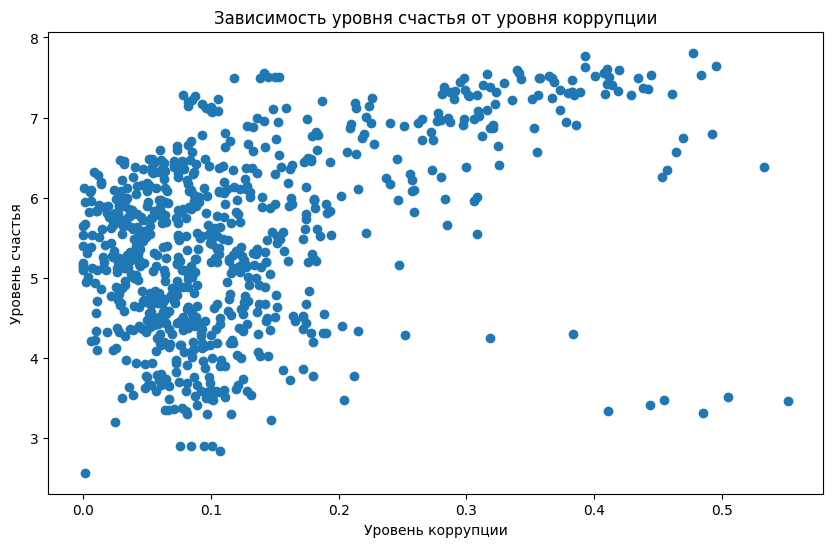

In [ ]:

plt.figure(figsize=(10,6))
plt.scatter(df['government_trust'], df['happiness_score'])
plt.xlabel('Уровень коррупции')
plt.ylabel('Уровень счастья')
plt.title('Зависимость уровня счастья от уровня коррупции')
plt.show()

In [ ]:
"""Проверим есть зависимость уровня счастья от уровня коррупции."""

"""Проверим через тест Шапиро-Уилка на нормальность распределения, если р-значение >0.05
значит распределение не нормальное."""

stat1, p_value1 = shapiro(df['happiness_score'])
stat2, p_value2 = shapiro(df['government_trust'])

print(f"Статистика1:{stat1:.10f} , р-значение1:{p_value1:.10f}")
print(f"Статистика2:{stat2:.10f} , р-значение2:{p_value2:.10f}")

"""Поскольку данные не распределены нормально и есть выбросы, посчитаем корреляцию Спирмена и Кендалла."""

spirmen_coef = df['happiness_score'].corr(df['government_trust'], method='spearman')
kendall_coef = df['happiness_score'].corr(df['government_trust'], method='kendall')

print(f"Корреляция Спирмена:{spirmen_coef:.10f}")
print(f"Корреляция Кендалла:{kendall_coef:.10f}")
"""Спирмен показывает зависимость ниже средней, Кендалл низкую зависимость, график показывает, что
примерно 20-30% данных находятся на высоком уровне счастья при высоком уровне коррупции.
Значит нельзя считать что уровень счастья связан с низким уровнем коррупции."""

Статистика1:0.9848101984 , р-значение1:0.0000002562
Статистика2:0.8323232060 , р-значение2:0.0000000000
Корреляция Спирмена:0.3511349496
Корреляция Кендалла:0.2345727177


Задание 2  
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

- Оставьте только два столбца:'Temperature' и 'Sum'.
- Постройте диаграмму рассеяния.
- Постройте модель линейной регрессии для выбранных признаков.
- Рассчитайте точность модели на тестовой выборке.
- Выведите график остатков.

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/gas_sales_data[1].csv')

"""Оставляем только столбцы 'Temperature' и 'Sum'."""
df = df[['Temperature', 'Sum']]

df.head(10)

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248
5,23.17,551581
6,26.52,464203
7,26.26,451322
8,20.79,517377
9,15.37,694927


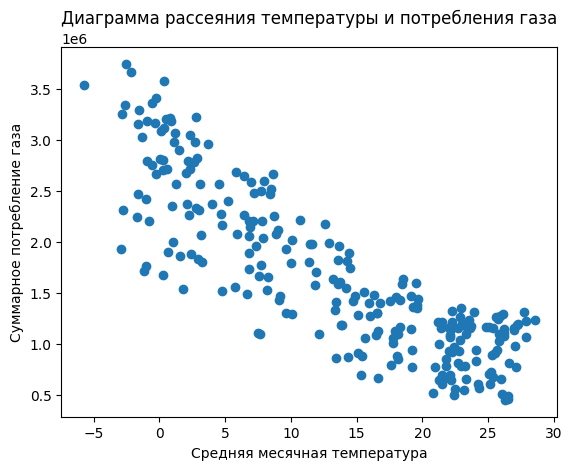

'На графике видно, что с ростом температуры потребление газа снижается.'

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Temperature'], df['Sum'])
plt.xlabel('Средняя месячная температура')
plt.ylabel('Суммарное потребление газа')
plt.title('Диаграмма рассеяния температуры и потребления газа')
plt.show()
"""На графике видно, что с ростом температуры потребление газа снижается."""

In [ ]:
"""Проверим через тест Шапиро-Уилка на нормальность распределения, если р-значение >0.05
значит распределение не нормальное."""

stat1, p_value1 = shapiro(df['Temperature'])
stat2, p_value2 = shapiro(df['Sum'])

print(f"Статистика1:{stat1:.10f} , р-значение1:{p_value1:.10f}")
print(f"Статистика2:{stat2:.10f} , р-значение2:{p_value2:.10f}")

"""Поскольку данные не распределены нормально и есть выбросы, посчитаем корреляцию Спирмена и Кендалла."""

spirmen_coef = df['Temperature'].corr(df['Sum'], method='spearman')
kendall_coef = df['Temperature'].corr(df['Sum'], method='kendall')

print(f"Корреляция Спирмена:{spirmen_coef:.10f}")
print(f"Корреляция Кендалла:{kendall_coef:.10f}")
"""Корреляции Спирмена и Кендалла довольно высокие, но отрицательные, значит с ростом температуры
потребление газа снижается."""

Статистика1:0.9303593068 , р-значение1:0.0000000016
Статистика2:0.9401254505 , р-значение2:0.0000000129
Корреляция Спирмена:-0.8400290051
Корреляция Кендалла:-0.6354005329


'Корреляции Спирмена и Кендалла довольно высокие, но отрицательные, значит с ростом температуры\nпотребление газа снижается.'

In [ ]:
"""Построим модель линейной регрессии для выбранных признаков"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

"""Перемешиваем данные перед разделением"""
df = df.sample(frac=1).reset_index(drop=True)

"""Разделяем данные на тренировочные и тестовые наборы"""
X = df[['Sum']]  # Признаки
y = df['Temperature']  # Целевой признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""Создаем и обучаем модель линейной регрессии"""
model = LinearRegression()
model.fit(X_train, y_train)

"""Предсказания на тестовом наборе"""
y_pred = model.predict(X_test)

"""Оцениваем точность модели с помощью R^2"""
accuracy = r2_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.4f}')

Точность модели: 0.7916


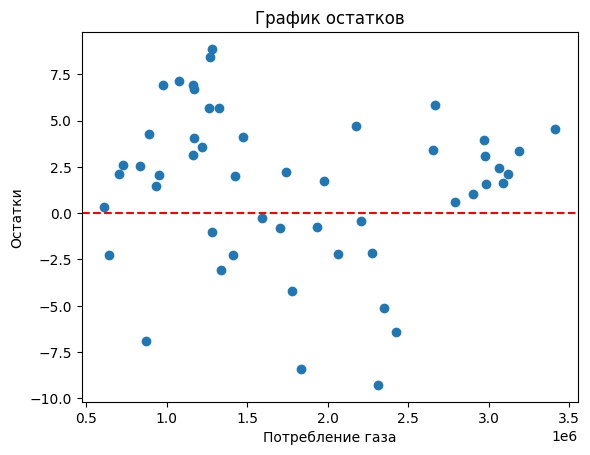

In [ ]:
"""Построим график остатков."""

residuals = y_test - y_pred

plt.scatter(X_test['Sum'], residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Линия нуля для удобства
plt.xlabel('Потребление газа')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()